In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
tf.__version__

'2.0.0-rc1'

In [2]:
root = pathlib.Path("../../data/house_prices/")
train_dir = root.joinpath("train.csv")
test_dir = root.joinpath("test.csv")

In [3]:
train_data = pd.read_csv(train_dir)
test_data = pd.read_csv(test_dir)

In [4]:
train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
452,453,60,RL,NaN,9303,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,204000
408,409,60,RL,109.0,14154,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,280000
45,46,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,319900
1231,1232,90,RL,70.0,7728,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2006,WD,Normal,132500
648,649,60,RL,70.0,7700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,155000


In [5]:
test_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
435,1896,50,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
562,2023,50,RL,70.0,10759,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2008,WD,Normal
287,1748,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,168,0,NaN,NaN,NaN,0,5,2009,WD,Normal
214,1675,120,RL,47.0,6904,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
88,1549,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 处理数据为空数据

In [7]:
train = train_data.copy(deep = True)
test = test_data.copy(deep = True)

In [8]:
# 删除id列
all_features = pd.concat((train.iloc[:, 1:-1], test.iloc[:, 1:]))
all_features.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
568,160,FV,24.0,2280,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
1062,20,RL,97.0,11800,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Family
1289,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,10,2006,New,Partial
123,60,RL,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1073,60,RL,75.0,7950,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal


In [9]:
numrice_features = all_features.dtypes[all_features.dtypes != "object"].index
numrice_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

### 填充数据

In [10]:
all_features[numrice_features] = all_features[numrice_features].apply(lambda x:((x-x.mean())/x.std()))

In [11]:
# 归一化后可以用0填充数据
all_features[numrice_features] = all_features[numrice_features].fillna(0)

In [12]:
all_features = pd.get_dummies(all_features,dummy_na=True)
all_features.shape

(2919, 331)

In [13]:
len_train = train.shape[0]
x_train = all_features[:len_train]
x_test = all_features[len_train:-1]
y_train = train.SalePrice.values

In [14]:
x_train.shape

(1460, 331)

In [15]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [16]:
y_mean,y_std = y_train.mean(),y_train.std()

In [17]:
y_train =y_train / 10000.

In [18]:
y_train = np.asarray(y_train,dtype="float32")

In [19]:
y_train

array([20.85  , 18.15  , 22.35  , ..., 26.65  , 14.2125, 14.75  ],
      dtype=float32)

In [20]:
y_train = pd.DataFrame(y_train)
y_train

,0
0,20.8500
1,18.1500
2,22.3500
3,14.0000
4,25.0000
...,...
1455,17.5000
1456,21.0000
1457,26.6500
1458,14.2125


In [21]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dense(1,activation="relu")
    ])
    model.compile(loss="mse",metrics=['mae'])
    return model

In [22]:
def create_dateset(x,y):
    x = tf.constant(x,dtype=tf.float32)
    y = tf.constant(y,dtype=tf.float32)
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.repeat().shuffle(64)
    return ds

In [23]:
from sklearn.model_selection import KFold 

In [24]:
kFold = KFold(n_splits=4, shuffle=True)

In [25]:
scores = []
for train_index, test_index in kFold.split(x_train, y_train):
    ds_train = create_dateset(x_train.iloc[train_index].values,y_train.iloc[train_index].values)
    ds_test = create_dateset(x_train.iloc[test_index].values,y_train.iloc[test_index].values)
    
    model = create_model()
    steps_per_epoch = len(train_index) // 64
    validation_steps = len(test_index) //64
    history = model.fit(ds_train,epochs=100,steps_per_epoch=steps_per_epoch,validation_data=ds_test,
          validation_steps = validation_steps,verbose = 0)
    val_mae = history.history['mae']
    scores.append(val_mae)
    

In [26]:
average_mae_history = [np.mean([x[i] for x in scores]) for i in range(100)]

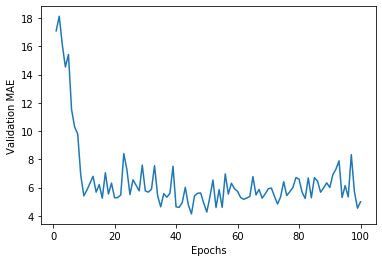

In [27]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [28]:
model = create_model()

In [32]:
steps_per_epoch = (x_train.shape[0]) // 64
ds_train = create_dateset(x_train.values,y_train.values)
history = model.fit(ds_train,epochs=50,steps_per_epoch=steps_per_epoch,verbose = 1)
history.history['mae']

Train for 22 steps
Epoch 1/50
22/22 [==============================] - 1s 31ms/step - loss: 368.6742 - mae: 18.3294
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 383.9050 - mae: 17.7242
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 207.8564 - mae: 13.2261
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 147.0192 - mae: 10.5695
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 143.0392 - mae: 9.9856
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 165.3749 - mae: 9.4941
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 81.3206 - mae: 6.5436
Epoch 8/50
22/22 [==============================] - 0s 3ms/step - loss: 57.3630 - mae: 5.5579
Epoch 9/50
22/22 [==============================] - 0s 2ms/step - loss: 92.9268 - mae: 6.6969
Epoch 10/50
22/22 [==============================] - 0s 2ms/step - loss: 54.0974 - mae: 5.0481
Epoch 11/50
22/22 [==========

[18.329416,
 17.72423,
 13.226091,
 10.569524,
 9.985592,
 9.494097,
 6.5435524,
 5.5579295,
 6.696918,
 5.048075,
 5.6701293,
 6.7750607,
 8.024644,
 5.9637666,
 6.6910915,
 5.6356745,
 5.7963343,
 7.4088316,
 6.1505504,
 4.8571467,
 8.45275,
 4.095286,
 6.0902414,
 5.024093,
 5.0434523,
 6.744253,
 5.9609194,
 5.288962,
 5.7909594,
 9.562677,
 8.689395,
 6.3776474,
 6.804683,
 7.6416364,
 4.670291,
 4.0109806,
 5.086892,
 4.756486,
 3.954754,
 5.854525,
 5.2927504,
 5.431203,
 4.225214,
 6.631247,
 6.554949,
 6.6460843,
 3.7253513,
 6.8615656,
 4.353021,
 4.8366933]

In [30]:
x_train.shape[0]

1460